In [1]:
from keras.datasets import reuters


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 2s 1us/step


In [8]:
import numpy as np
def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


In [9]:
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i,label]=1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [14]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 2.7506 - accuracy: 0.5069 - val_loss: 1.9159 - val_accuracy: 0.6140
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.6058 - accuracy: 0.6617 - val_loss: 1.3969 - val_accuracy: 0.6820
Epoch 3/20
16/16 [==============================] - 1s 36ms/step - loss: 1.2057 - accuracy: 0.7380 - val_loss: 1.1866 - val_accuracy: 0.7240
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.9749 - accuracy: 0.7881 - val_loss: 1.0637 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8044 - accuracy: 0.8266 - val_loss: 1.0066 - val_accuracy: 0.7730
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.6746 - accuracy: 0.8589 - val_loss: 0.9378 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 1s 36ms/step - loss: 0.5612 - accuracy: 0.8796 - val_loss: 0.9057 - val_accuracy: 0.8150
Epoch 8/20
16

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

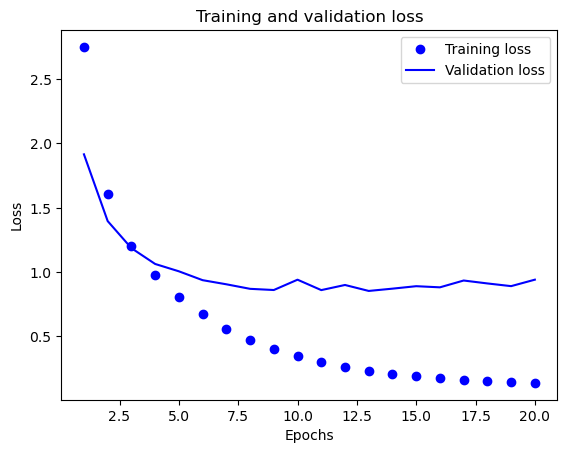

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 44ms/step - loss: 2.6799 - accuracy: 0.5135 - val_loss: 1.7984 - val_accuracy: 0.6080
Epoch 2/9
16/16 [==============================] - 1s 35ms/step - loss: 1.5147 - accuracy: 0.6768 - val_loss: 1.3656 - val_accuracy: 0.6880
Epoch 3/9
16/16 [==============================] - 1s 32ms/step - loss: 1.1484 - accuracy: 0.7464 - val_loss: 1.1833 - val_accuracy: 0.7400
Epoch 4/9
16/16 [==============================] - 1s 32ms/step - loss: 0.9285 - accuracy: 0.7977 - val_loss: 1.0620 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 0s 30ms/step - loss: 0.7666 - accuracy: 0.8343 - val_loss: 0.9930 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 0s 27ms/step - loss: 0.6344 - accuracy: 0.8628 - val_loss: 0.9325 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 0s 28ms/step - loss: 0.5251 - accuracy: 0.8869 - val_loss: 0.9621 - val_accuracy: 0.7860
Epoch 8/9
16/16 [===